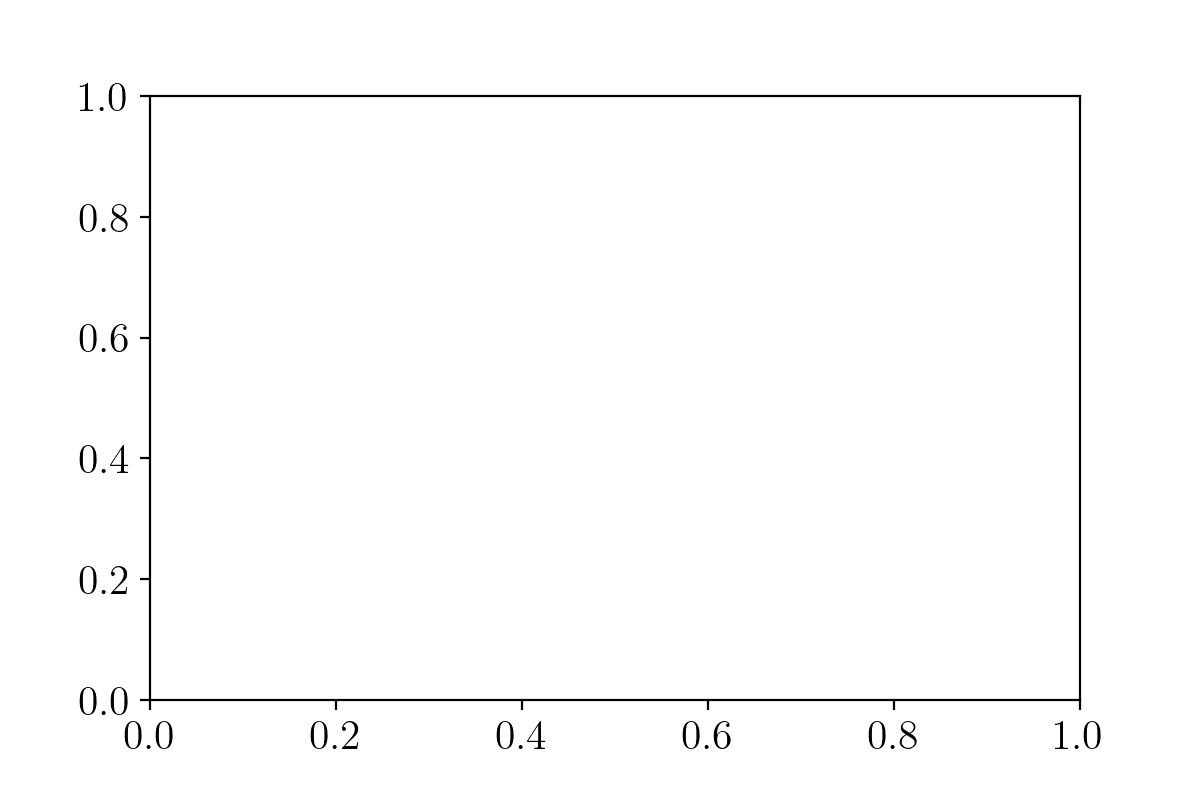

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
import phd_plot_style
pub_fig_style = phd_plot_style.phd_revtex_plots()
# magic commands
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None, 'dpi': 200}
# Colors
cBlues = sns.color_palette("Blues_r", n_colors=7)#[::3]
cOranges = sns.color_palette("Oranges_r", n_colors=7)#[::3]#[1:-1]
cGreens = sns.color_palette("Greens_r", n_colors=7)#[::3]#[1:-1]
cPurples = sns.color_palette("Purples_r", n_colors=7)#[::3]#[1:-1]
cGreys = sns.color_palette("PuRd_r", n_colors=7)#[::3]#[1:-1]
color_zip = [cPurples, cBlues, cOranges, cGreens, cGreys]
# define dimensions
fig_width  = pub_fig_style.revtex_sizes_active["page.columnwidth"] * pub_fig_style.tex_pt_to_inch
fig_height = pub_fig_style._get_revtex_rc()["figure.figsize"][1]

plt.figure(figsize=(6, 4))

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    "font.size": 15,
'axes.titlesize': 15,
'axes.labelsize':  15})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#multi = 5

    

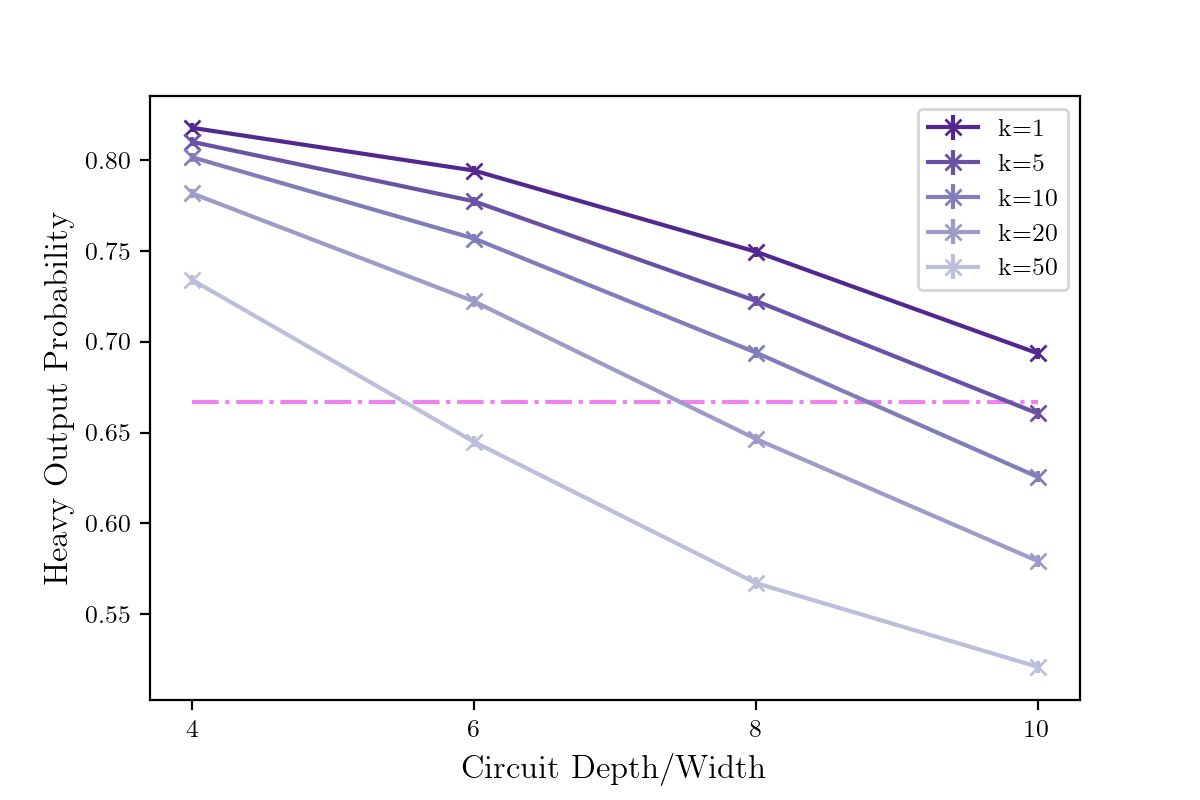

In [85]:
plt.xlabel('Circuit Depth/Width')
plt.ylabel('Heavy Output Probability')
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Roman",
    "font.size": 9,
'axes.titlesize': 12,
'axes.labelsize':  12})
plt.xticks(np.arange(2, 11, step=2))
plt.errorbar(np.arange(4,11,2),avg_mean_1[1::2] , avg_var_1[1::2] ,marker = 'x',color = cPurples[0])
plt.errorbar(np.arange(4,11,2),avg_mean_5[1::2], avg_var_5[1::2]  ,marker = 'x',color = cPurples[1])
plt.errorbar(np.arange(4,11,2),avg_mean_10[1::2], avg_var_10[1::2],marker = 'x',color = cPurples[2])
plt.errorbar(np.arange(4,11,2),avg_mean_20[1::2], avg_var_20[1::2] ,marker = 'x',color = cPurples[3])
plt.errorbar(np.arange(4,11,2),avg_mean_50[1::2], avg_var_50[1::2] ,marker = 'x',color = cPurples[4])
plt.legend(['k=1','k=5','k=10','k=20','k=50'])

plt.hlines(2/3,4,10,colors='violet', linestyles='dashdot')
plt.savefig('QV_compare.pdf')

In [242]:
def process_QV(hvy_out):
    i = 0
    while hvy_out[i] > 2/3 and i < len(hvy_out) - 1:
        i += 1
    return i + 1 

nlist = [0.8, 0.82, 0.84, 0.86, 0.88, 0.90, 0.92, 0.94, .96,.98, 1]
dBs = list(np.arange(15,25,1))
total = np.zeros([len(nlist),len(dBs)])
for i in range (len(nlist)):
    for j in range (len(dBs)):
        dB = dBs[j]
        k = 5
        e = nlist[i]
        ntrials = 20
        hvy_out = np.load(f'data/QV_raw_data_dB{dB}_ogkp_e{e}_k{k}.npy')[0]
        if process_QV(hvy_out) == 1:
            total[i][j] = process_QV(hvy_out)
        else: 
            total[i][j] = process_QV(hvy_out)

In [243]:
x = dBs*len(nlist)
y = []
for i in range (len(nlist)):
    y += [nlist[i]]*len(dBs)
z = total.reshape(len(x))


In [36]:
z

array([ 2.,  3.,  4.,  6.,  8., 10., 10., 10., 10., 10., 10.])

Text(0, 0.5, 'log$_2$(QV)')

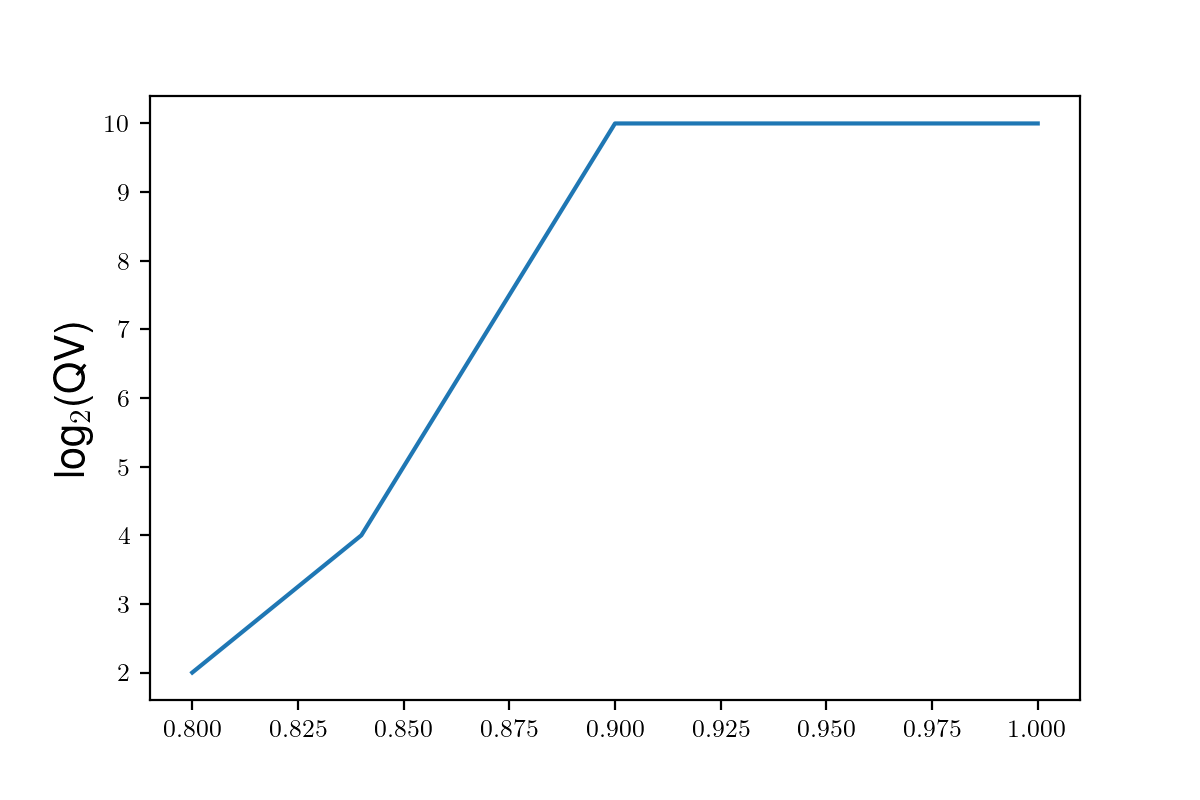

In [35]:
plt.plot(y,z)
plt.ylabel("log$_2$(QV)", size=15)

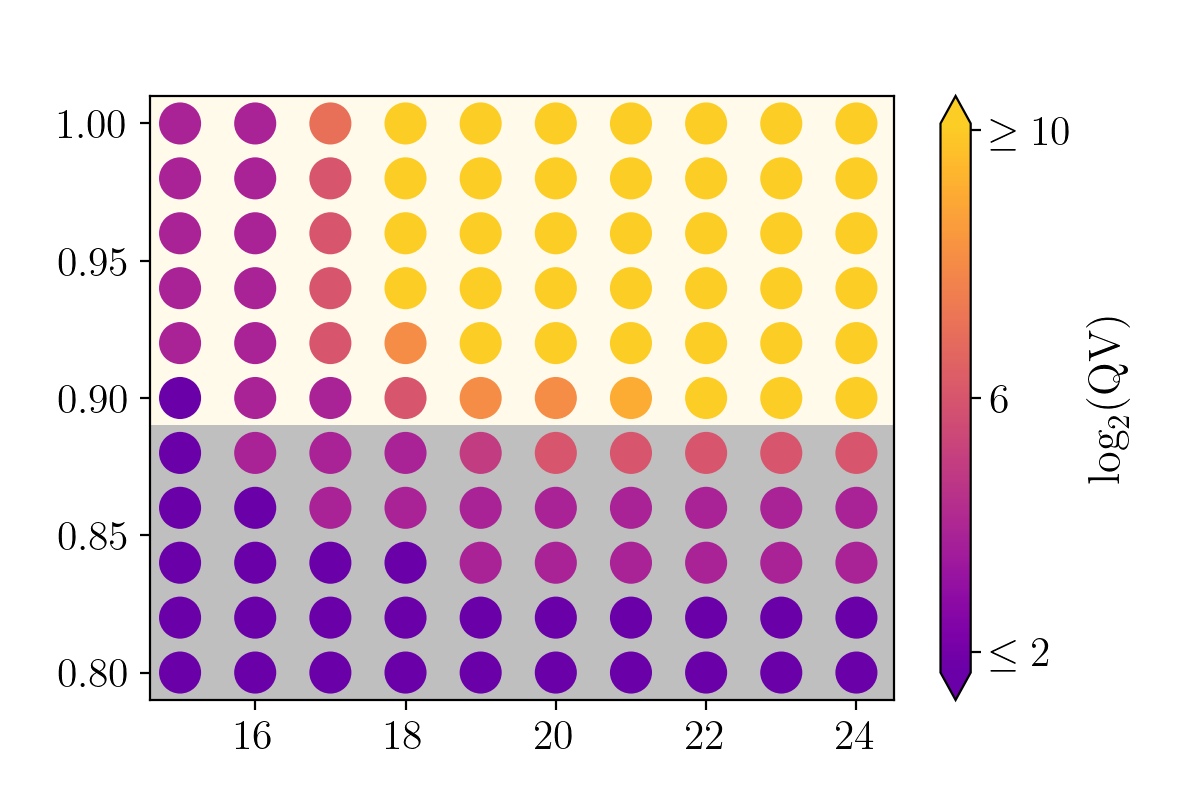

In [251]:
#plt.pcolormesh(total,cmap="plasma")
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

plt.figure(figsize=(6,4))
arr = np.linspace(0, 50, 100).reshape((10, 10))
plt.fill_between(np.arange(14.5,25.5,1), .89, 0.79, facecolor="grey",alpha=0.5)
plt.fill_between(np.arange(14.5,25.5,1), 1.01, .89, facecolor="Cornsilk",alpha=0.6)

cmap = plt.get_cmap('plasma')
new_cmap = truncate_colormap(cmap, 0.2, 0.9)
plt.scatter(x,y,c = z, s=200,cmap=plt.cm.get_cmap(new_cmap,11))
plt.xlim(14.6,24.5)
plt.ylim(0.79,1.01)
#plt.xlabel(r'$s_{\textrm{gkp}}$',size =10)
#plt.ylabel('$\eta$')
plt.yticks(np.arange(0.8, 1.01, step=0.05)) 
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

cbar.set_label(label=r"$\textrm{log}_2(\textrm{QV})$", size=16)
cbar.set_ticks([2.3,6,9.9])
cbar.set_ticklabels(["$\leq 2$","$6$","$\geq 10$"])
cbar.ax.tick_params(labelsize=15)

plt.savefig('QV,sgkp.pdf')

In [51]:
total

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.],
       [ 4.,  4.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.],
       [ 4.,  5.,  6.,  8.,  8., 10., 10., 10., 10., 10.],
       [ 4.,  6.,  8., 10., 10., 10., 10., 10., 10., 10.],
       [ 4.,  7., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 5.,  8., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 5.,  8., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 5.,  8., 10., 10., 10., 10., 10., 10., 10., 10.]])

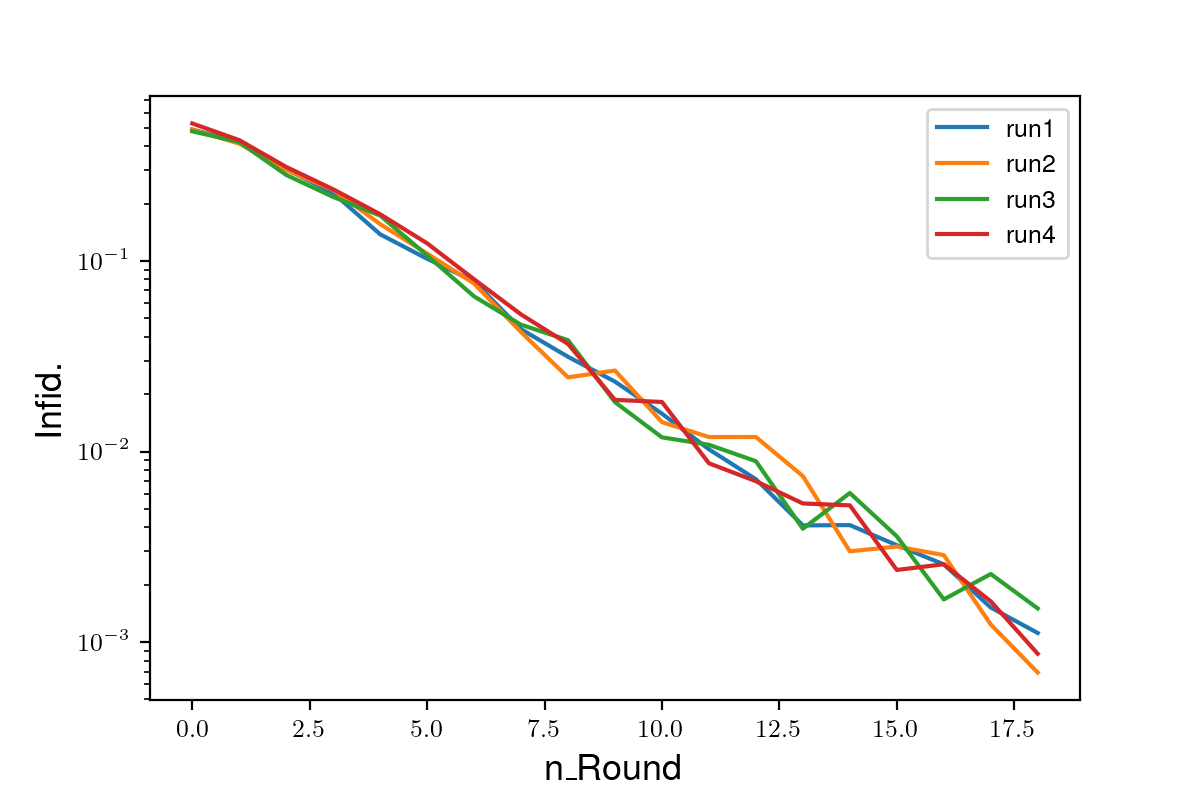

In [26]:
r1 = [[-0.2612519592881692, -0.22568333140353683, -0.25408101533154115, -0.21396114715223452, -0.2653532068671279, -0.2584182470709737, -0.2750198779196559, -0.24200259415670305, -0.2896224978422588, -0.22194055096184473, -0.2414308027065897, -0.2704576667574569, -0.22800971368864512, -0.23989994122599717, -0.24084461855355574, -0.2518954768282762, -0.22302673070602672, -0.24951827087488385, -0.2663089903023493, -0.22289820847425826, -0.2297173308761046, -0.22813765666148397, -0.24706959355043412, -0.2542584319186325, -0.24432515357786938, -0.2717891978610656, -0.22209794190095283, -0.2711417215079306, -0.23472390496153409, -0.23957810452422573, -0.24485391350147312, -0.2801391237942092, -0.3103053673337359, -0.24794863707905684, -0.2567470369383843, -0.25065897344218335, -0.2449973831199424, -0.2655834782882796, -0.2239041310369503, -0.2132925774315246], [-0.31675874113643127, -0.322907599000567, -0.32822325703850186, -0.32931609974034426, -0.34395137356979305, -0.3257529585830258, -0.35185526160074826, -0.29853335676397713, -0.34612484335537785, -0.25624245781967603, -0.3720844705838688, -0.2768095287344086, -0.3157185345405618, -0.3177043104160317, -0.29560126517586177, -0.3327486949511533, -0.3361247345379084, -0.2798565933348584, -0.36837142643463466, -0.33543672372244865, -0.34444295066813574, -0.26884814250100497, -0.3396940263982434, -0.3115612983422874, -0.2748923019418225, -0.3185631705933421, -0.3322972464445396, -0.3491667108340365, -0.3075473855941662, -0.325927710947209, -0.3377986994129745, -0.3460256424099396, -0.26770896401206956, -0.29538828070355017, -0.2809402308925134, -0.3348979495156782, -0.3738420987731741, -0.33203768591229293, -0.29417316802229304, -0.37440411159799686], [-0.40079265444035983, -0.4476233789337651, -0.42339253148981465, -0.39351915599908727, -0.41432767299137, -0.43106270599902374, -0.4140915391899839, -0.42928904388530964, -0.4186867926050744, -0.37198842590134945, -0.3591795551520981, -0.4498956022739764, -0.49249634856077296, -0.41245623959476485, -0.5004382357802712, -0.43573632600811874, -0.42807004182757674, -0.5182789899132093, -0.3838753341032428, -0.431202182943798, -0.4583607936118089, -0.3778436530709099, -0.44139476100087266, -0.38924134570962715, -0.4611683706508353, -0.40808439572937233, -0.37944639503829025, -0.43913293030502565, -0.4543101574040456, -0.39347969713727127, -0.4648454517508249, -0.435223089673572, -0.38946692481521944, -0.5049614865457877, -0.3824653085235951, -0.399090246272036, -0.3952175297279532, -0.4152095612578608, -0.4141198398082906, -0.37008755736578003], [-0.5964067270755624, -0.6143334529943779, -0.5709849989193689, -0.5077341542930227, -0.44502246578666627, -0.5333427242957921, -0.6002395072464721, -0.5408872733718295, -0.5534722387818274, -0.6436390125914835, -0.492895381169089, -0.5800801923015079, -0.4999689113997456, -0.5026244593792788, -0.5677537172465308, -0.5334756844329018, -0.4480975893115279, -0.4966230324612281, -0.545872536751716, -0.5484972253441537, -0.5695639103448744, -0.5948143018760282, -0.5877771480572744, -0.5554652656064382, -0.5143461498379649, -0.5290011733715997, -0.5141736969157409, -0.5344480721008539, -0.4887980565921729, -0.5564510495014915, -0.49339538679500855, -0.5534339723514866, -0.4184318141778783, -0.5185531951343103, -0.5947921712350428, -0.5857890479650233, -0.5272388864688909, -0.6183689181685936, -0.5621984099273268, -0.5344193614430949], [-0.6061035767293554, -0.6164128476178069, -0.6486866162207892, -0.6743984140309407, -0.6719221001682507, -0.6415276232036532, -0.7156229796114926, -0.6577260148062973, -0.6916129603219761, -0.6697075557280846, -0.7212241068050461, -0.6616644536130607, -0.6514479365007844, -0.713123843387836, -0.7112886648765163, -0.5557773953171573, -0.8235519602991878, -0.6574166425376317, -0.6668487289583249, -0.727162219967337, -0.6049321104678836, -0.7116358908306659, -0.6956313963625556, -0.7831906563424191, -0.6244390846381965, -0.7026108810443694, -0.62953403731765, -0.8602061720888887, -0.6476242736549599, -0.661282004817887, -0.6810972938312914, -0.547191901966217, -0.6836104765368198, -0.6435417885823627, -0.7031670759575491, -0.6619475495904671, -0.7036207086196556, -0.700892299050657, -0.7781825217591969, -0.6321141653329617], [-0.8517796770089341, -0.8795571876797204, -0.6256116791562426, -0.7281348695232236, -0.8133087462802495, -0.9790200612160633, -0.7331677146904959, -0.8085377750454897, -0.810354094137127, -0.7962935094949605, -0.8341910264559407, -0.8646263158255516, -0.8532690378148168, -0.7930838448097166, -0.8727523263520691, -0.8923878343671577, -0.7933953809032466, -0.9721244447951379, -0.8721165413301193, -0.8975253092364595, -0.9886803597087683, -0.728779093033188, -0.8394974484779332, -0.8135857039817804, -0.8165706443091002, -0.9206512292702739, -0.7277795519940655, -0.812670148424509, -0.830288529358581, -0.8047386079382504, -0.8441090459284908, -0.701858349057225, -0.8893037216165329, -0.8256554213214116, -0.8278197319135854, -0.7662829010464618, -0.7408392699649131, -0.6941817763632977, -0.7276379487768958, -0.8823306439145291], [-1.0920355144087706, -0.8830039790381375, -0.724993783541602, -0.8976962641062995, -1.0028311930646787, -1.0405783517320248, -1.0264316577625556, -0.968282150929829, -0.8616333980018124, -0.6748358526087462, -0.9356169353936006, -0.940065417073861, -1.0381240219559293, -1.107090261818146, -0.8410562604250273, -0.8851595468320399, -1.0214439881200863, -0.9702730129318681, -1.0925533099892712, -0.85786852167095, -0.9327099945402292, -0.9110168671032115, -1.054633890154864, -1.102594491445983, -0.965038115951644, -0.925725133151349, -0.955288214416478, -0.9722688339744947, -0.9507989711841679, -0.9050923022066021, -0.9422047273638765, -0.8969276326927933, -1.051575212967946, -1.0512655552932, -1.0204410629362648, -0.9416201783596606, -0.9658340144746606, -1.076374357045972, -0.9541655831548248, -0.9907063756295486], [-1.0237592884341302, -0.8523893041957477, -1.04847617802521, -1.2807316796328219, -1.1971034048087272, -0.9877525835348916, -1.1205912026673444, -1.0602774141917277, -1.1270166017467171, -1.0908681527700235, -1.1070717122659677, -1.0906907670464536, -1.0728681043135173, -1.1377828136709673, -1.1502584447590556, -1.0276533667419951, -1.20317393252952, -1.093517977832858, -1.1224197694983256, -1.2459746915519212, -1.2887735194748209, -1.1360532876409037, -1.1276033236956295, -1.1198978606163525, -0.9976051565945196, -0.9822692450017517, -0.9865171737925843, -1.0552441426812065, -1.1611528740997223, -1.3581002173381216, -1.2390796955746732, -1.202085905644658, -1.112442526034026, -1.1070213674748912, -1.1408108825842418, -1.0436377523809128, -1.1288334753536298, -1.1461673841325806, -1.1293756991421084, -1.0930781382545587], [-1.1470603783639388, -0.9057649460117305, -1.3611519962902314, -1.1872461195789765, -1.1847904818269883, -1.2702168879488334, -1.117445239323192, -1.1269014788952347, -1.2665103453132083, -1.3300826627516984, -1.2840805774898507, -1.1337037538861077, -1.1313047485889172, -1.1830077928148421, -1.1628172707544056, -1.4190333072966623, -1.321386048687282, -1.235513398792006, -1.3327893910475461, -1.503020272115731, -1.1958776326370855, -1.294177686584073, -1.3576934083946737, -1.0554150730565572, -1.1906275201999135, -1.3434280811980162, -1.1151989438302627, -1.3357956799539985, -1.2498460583746824, -1.254758196705311, -1.1713996472194221, -1.3696774941728287, -1.3128970563596436, -1.1704874306546513, -1.0918111715579792, -1.2569392351621524, -1.296592487839369, -1.2693625210234925, -1.17949813390312, -1.1985806575927713], [-1.1007002296619752, -1.2954631371008682, -1.090069000538285, -1.3407905865549512, -1.3465536474145139, -1.2612727142007085, -1.2791836934954368, -1.5512787287643763, -1.3622275500168055, -1.3333638503081617, -1.453780543451931, -1.3577406007232238, -1.4442422437381135, -1.5323748046628767, -1.3424048716411578, -1.347550576621552, -1.2739456085814382, -1.5153255455016046, -1.5090095214764379, -1.415830431948957, -1.5810974829618607, -1.4548376637689377, -1.4525752687802294, -1.624863013263473, -1.2872334320617271, -1.0658699005152081, -1.4542066188370455, -1.1948828486068614, -1.3435666201470713, -1.3229754086550667, -1.3998238239074634, -1.1941843987161809, -1.5556200618433313, -1.5810277654875489, -1.468534288047751, -1.4563600690428937, -1.4064605624939062, -1.633328762848697, -1.4121630297554792, -1.2762938884764345], [-1.5865915361853251, -1.7052156662325375, -1.6770682375755794, -1.3652021322251982, -1.5039863249452508, -1.5804559785238361, -1.8013625946915597, -1.7755110538112657, -1.542145252091484, -1.5078777269059247, -1.6785014292388218, -1.7124180322404652, -1.583577747627859, -1.0462344683855112, -1.7235181756146376, -1.3159725923647803, -1.2138904003751958, -1.4494211742588938, -1.3556376618311303, -1.6442967575237033, -1.3443903926421525, -1.6602337402263547, -1.683678445050881, -1.49590635697053, -1.1042837325054582, -1.533693836652631, -1.5397537143419695, -1.2526430119591543, -1.5239504340049002, -1.4678151304934457, -1.6203800625195903, -1.3222412465898365, -1.619185011145524, -1.1417861969141403, -1.4064596825332099, -1.6245212202982628, -1.421143525011944, -1.6462258570203867, -1.4079679096310524, -1.5296587079228372], [-1.9870488370261945, -1.7100499736336874, -1.6517399271715696, -1.9884077332229424, -1.780987654533952, -1.7116071075915456, -1.6130518073629128, -1.7783733052066255, -1.8643688764781883, -1.7299958958435526, -1.7165350561510706, -1.4753660102690838, -1.7541643703142673, -1.736163539283652, -1.8358398901667479, -1.8023752297448887, -1.7547251779640587, -1.7718585190471734, -1.6318698193624133, -1.5475413663873403, -1.7520004923965462, -1.837142627735346, -1.849029463213686, -1.7862028619553791, -1.7812253464975456, -1.669180493285443, -1.7927453322268883, -1.6001916664961313, -1.6005340914191335, -1.776430038924037, -1.687359254904966, -1.7031512195904417, -1.615070002998994, -1.5969991008850166, -1.4709459017881379, -1.5160169234934826, -1.8623505334345, -1.8600938669805085, -1.7794894400876884, -1.6902977720169685], [-1.8175058048543986, -1.9117784699471678, -1.6615917687547488, -1.3881679303685979, -1.8598813421502798, -1.7511297779752732, -1.887026411751242, -1.7469313057879923, -1.8306933779686825, -1.8528962185037052, -1.97524433102597, -1.9352409429200415, -1.759946277112779, -1.5063389073283038, -1.7655868559736079, -1.6554958496237013, -1.6557879194113088, -1.8932440097434746, -2.0387586636084, -1.8498054380980067, -2.0758869944945095, -1.9268835448992945, -1.664921758368662, -1.8789489790427425, -1.972951933679162, -1.7790845615568232, -1.9152203203392602, -1.6675336210586473, -1.8515454326866125, -2.0846939714923267, -1.851982136435904, -1.8644800190072568, -2.145495222611061, -1.762038451168124, -1.5465634279725764, -1.7963582908915459, -1.8419874277094912, -1.7656713608070453, -2.0275533263461307, -1.5757682162948143], [-1.8849214227476856, -1.8491196783575534, -1.7960625345105117, -2.071222106089252, -2.073448133146658, -1.988891922814784, -1.7702409116705848, -2.283971052578569, -1.9441202817727774, -1.8567331840233872, -2.037684502351065, -1.8960386339842479, -2.081039063564865, -2.060486041242938, -1.528628067572552, -2.0533055055153255, -2.1969789877789623, -2.014354996755819, -2.0454630962479974, -1.9632857228353984, -2.0021698928967173, -2.005795957565737, -1.8915790532383563, -2.0071798041455637, -1.8246426353834202, -1.9315459816568283, -1.8656056755206425, -1.8435879614356183, -1.824548146134125, -1.945917534830883, -1.7957281622911256, -2.3877294449409994, -1.9744300388124978, -2.1337427305340575, -1.9924151431378803, -1.9162010127655311, -1.7001195498134027, -1.1950699407897412, -1.9515920213578029, -2.0035839739480674], [-1.9823010546989337, -1.927578266765741, -2.1441655569467777, -1.957235275240971, -2.0626934635143717, -2.0490959961031106, -2.1221444216218273, -2.2682953200785883, -1.9998175250061205, -2.170975788433962, -1.9243534298037905, -2.0056490734085015, -1.84167330104522, -1.9510798124443975, -2.0009506059560827, -2.0456892643424758, -1.7663197780462772, -2.309953759009696, -1.3608516348563908, -2.168028434655194, -2.0350761417844354, -1.9157658236919695, -1.8831455754385167, -2.198290144470508, -2.041328561720173, -1.5412561829976121, -2.0913470730914923, -2.2422255411122154, -1.8253092531686546, -1.9011075804904471, -1.8966476016765994, -1.8943818939653214, -2.141561408042387, -2.096760314370348, -1.8453902010162289, -2.3658139252248964, -2.386114246168319, -2.090589557781564, -2.2305787848094263, -1.9359015258073669], [-1.83927092618989, -2.182643406570802, -2.1048088791695037, -2.198023239957389, -2.091747643024899, -2.242430567669549, -2.24681346829843, -2.2332339122186005, -2.2089188041783627, -2.172878196623725, -2.263995497264378, -2.082994268541459, -2.0684575422853406, -2.369491578706144, -2.248504460524785, -2.0829232436090774, -2.3934389609048483, -2.2266931737369657, -2.4915761516229176, -2.1168409045332743, -2.051475336873982, -2.051895204279151, -2.1386781897281057, -2.3481556819517033, -2.0307053495608507, -2.1299833103808745, -2.2172566213723655, -1.9784840065023015, -2.040922574388752, -1.8473577828389158, -2.1842916249196516, -2.38226876163625, -2.0655900243691354, -2.1987698953968406, -1.9361785553810924, -2.3030750314974804, -1.9505866881925924, -2.1945251105787973, -2.3946019144535766, -1.877402893382292], [-2.172143936058866, -2.401167422556063, -2.211040198644356, -2.1313215605666933, -2.197740173640112, -2.306556703545315, -2.177310022254946, -2.410392376058649, -2.20589739041631, -1.9922896681159779, -2.0549357757247164, -2.5784338274949037, -2.176179694526921, -2.2802701261288076, -2.201187602070299, -2.5920332002874407, -2.226303611964673, -2.229230953059169, -2.1122400178300444, -2.023486687254674, -2.3997874275377473, -2.041871736141132, -2.391989634616729, -2.4415979878393124, -2.3693865312455666, -2.301524250108478, -2.3357096888200375, -2.390638451704455, -1.9782081847416588, -2.4871880103433597, -2.475560962603052, -2.5227721771961193, -2.1479775342543355, -2.233434736577644, -2.055951431215119, -2.036875924645421, -2.375005728788562, -2.3274667887217273, -2.1534124205153953, -2.405579734826382], [-2.0145869430688053, -2.4911053948463464, -2.5311219064886346, -2.0018474188657094, -2.6463252125499523, -2.633996919758739, -2.2846950927662624, -2.4316003227801883, -2.491437011275361, -2.0881134649535187, -2.4140304662918983, -2.499036899856312, -2.5321079527126877, -2.1550320700237244, -2.4586343803197463, -2.3554099319953843, -2.3231526059070986, -2.4508359771615718, -2.3984722740991775, -2.459240097916964, -2.2529803050477706, -2.519597738736205, -2.6135349227541864, -2.30793618427941, -2.397704061775333, -2.390265280880547, -2.5352216108701895, -2.3318390785736685, -2.651956687345298, -2.527990832179463, -2.130318651352612, -2.4955010928751493, -2.1873730923674586, -2.6471515077052383, -2.297116876354731, -1.908316171648219, -2.5304540764394954, -2.818452299525545, -2.524281565917923, -2.2550369031655206], [-2.3753414359301703, -2.178391249574827, -2.471300270770155, -2.952197576905594, -2.495944200921847, -2.2483943763035814, -2.3495196805407748, -2.521692327908155, -2.6283427519379496, -2.5040645393838243, -2.1519701670981966, -2.587977983193087, -2.579153540707958, -2.4391338315858646, -2.6242261857431175, -1.9710201292541596, -2.5390975674198013, -2.197283302046927, -2.335941529931427, -2.420189751644687, -2.3834355261204583, -2.7255645538988666, -2.1088609700997885, -2.1039792978221894, -2.498003551197013, -2.4625116349083416, -2.382019147972066, -2.818043487620331, -2.0601727417980635, -2.2821364738176717, -2.4139767435701693, -2.1977619414231855, -2.392773375361694, -2.313832361997457, -2.5827172858445877, -2.4665652739681585, -2.3081326087431333, -2.3317501627577766, -2.86231282607768, -1.9324254192822414]]
r2 = [[-0.2531746454785133, -0.2379269399626112, -0.30309427795449717, -0.2148300265411375, -0.2681595602569041, -0.26128191092824693, -0.24302530003401523, -0.255089312507404, -0.26861981777273797, -0.2916851579509743, -0.2497659056025275, -0.22887155454227118, -0.24006145895623873, -0.26007037739804734, -0.21011172309731327, -0.2985178115414794, -0.2469341528852509, -0.3013402203377427, -0.2622036732781788, -0.23574070019983992, -0.27238144795008495, -0.2654422671358863, -0.23185469334008266, -0.2660909132349596, -0.3012893469467709, -0.2702639269281613, -0.2998118896730372, -0.2520284040253443, -0.2373657321802655, -0.24485700684952724, -0.27414875199425487, -0.2460273565494057, -0.28250210864952763, -0.27760284407286634, -0.2711132406608278, -0.23609263445464138, -0.2308585735913456, -0.2558837092358961, -0.24394748121991702, -0.31095618450834145], [-0.328726732664284, -0.3361461764363032, -0.3319702626395887, -0.2718887538290963, -0.31203236082558766, -0.3732445765195965, -0.33308191360580025, -0.3558189136744152, -0.33612585712412846, -0.30065708723390544, -0.27638231874507746, -0.34816252977057427, -0.34731606559265976, -0.3646202476524188, -0.2971147898526425, -0.3641319274959913, -0.2897120367081485, -0.2730551764664303, -0.3548124157204028, -0.38400884663015267, -0.33805124048258267, -0.3386625157329771, -0.3168945045096526, -0.31113988403663495, -0.31929912741246713, -0.3388418263090249, -0.2736813043912047, -0.3208545173107095, -0.32913007375728753, -0.3355609643534662, -0.3142455459692569, -0.33484119872140994, -0.3611102185568048, -0.2994735209480629, -0.3779429792391765, -0.28968150467147, -0.31927803339250393, -0.32220134577439646, -0.31184432036364057, -0.34238778793866004], [-0.42283934134600043, -0.42853077094962516, -0.4125357859914565, -0.3566489401800038, -0.3609928739568758, -0.43605955598328594, -0.41698914122565933, -0.3857977575551241, -0.4118940751556484, -0.45413035597515133, -0.4420701501435502, -0.44570781075868166, -0.35455243919551377, -0.45675667132713255, -0.38871412626424184, -0.43569199187531765, -0.4337537217616249, -0.418754950944271, -0.39196286759491505, -0.4179069016792298, -0.3456464679943017, -0.40131696820860147, -0.3999195522543825, -0.3971751309902189, -0.5226685560698061, -0.4264334556315522, -0.4383236713005572, -0.43050101400217816, -0.38857240390557646, -0.3858468462312456, -0.43452366462081954, -0.46963419177274074, -0.4548556649460962, -0.41566591811858905, -0.41292699324635207, -0.4433346068951078, -0.4242920771229948, -0.3823612383120498, -0.45589573652705256, -0.48330837619854533], [-0.48958576962841033, -0.4946235612534912, -0.5185567263139077, -0.5909899997201579, -0.5288023925315671, -0.5113326325646634, -0.5036268299053595, -0.540761375968082, -0.5144408081140671, -0.5442575882520478, -0.5601745663545898, -0.5362451379689818, -0.5260864554374086, -0.5023795503926056, -0.5335365201953738, -0.4994058022249403, -0.5119133379647413, -0.5139636652949716, -0.5376407411389563, -0.5365987243868816, -0.5330539591336391, -0.5244324473314241, -0.6271051423617625, -0.5250789329867559, -0.47173786080891855, -0.5534603881720288, -0.5266917677741718, -0.6155569365203529, -0.5446323970917673, -0.5752066820376044, -0.49188959474042626, -0.4138445244449088, -0.6266500915748137, -0.5864350217872957, -0.5361243744708108, -0.5015480447369002, -0.5351581716504943, -0.5931708807641776, -0.4928707932530493, -0.4885008664380235], [-0.6788186192113668, -0.7063421440825792, -0.6651231701948849, -0.6190404187890997, -0.6455854830876381, -0.6318800223454246, -0.7022942692380516, -0.5702589249492822, -0.62312223994237, -0.8066511746604464, -0.6364985514937805, -0.5988818071958198, -0.7101075130240225, -0.6524161119274936, -0.6916781201480138, -0.7056358692345204, -0.5655578877030095, -0.6302035947910146, -0.5616954012085922, -0.5484852656389958, -0.6941278445472223, -0.5701965705400951, -0.7140985781352828, -0.5225213898642252, -0.6592629607958239, -0.5715800923597547, -0.622016756640423, -0.6405609155458463, -0.6841958874419979, -0.6904429366404955, -0.673631309740858, -0.6311268292078536, -0.5925234612341475, -0.5692111235991781, -0.8044329109583425, -0.5884060196987657, -0.6124384164616282, -0.7217213764657064, -0.7307097195617632, -0.5840510008187362], [-0.8328804213079262, -0.7624339305105272, -0.8784676164428034, -0.9055807884550258, -0.7682417098564152, -0.8254644058381277, -0.8911288880428163, -0.7238334725561038, -0.7723335357360979, -0.8374136140568884, -0.8257111018636366, -0.8150534019684555, -0.7624990464393998, -0.8304926585778727, -0.8480743330691027, -0.6270587822604581, -0.7701616124314309, -0.7998019063505728, -0.7445603535626875, -0.8929234541829953, -0.8180557463799417, -0.7422057063391485, -0.8112276764087532, -0.7331453098988121, -0.9612924650315924, -0.9446468271120542, -0.7888903887652788, -0.7427936496195322, -0.7559601324239378, -0.7787557458445694, -0.6992148510593942, -0.8049345960627351, -0.8811542885831162, -0.6908333283378977, -0.7429763755151035, -0.8573672057245599, -0.8897897545652687, -0.8561707156321026, -0.7662982157044553, -0.9013990293189543], [-0.883850816765871, -0.9620470483091002, -1.016279614484653, -0.9100082391208788, -0.9682507099799674, -1.1153573689227814, -0.9106708440379834, -0.8895908328224231, -0.8592111951927544, -0.9659737739156222, -0.9706041533312033, -0.9183832375360745, -0.9853740277911688, -0.9720419120082577, -1.1137963448903678, -0.9111496152265226, -0.8925942406701057, -0.8686228738477303, -0.927607773255432, -0.7923172133249761, -0.8358249905141738, -1.0202717830239956, -1.0307097947676525, -0.9475016844291101, -0.9958734937070874, -1.0197892634690433, -0.9308272288825398, -0.743334030421412, -1.0303395168654046, -0.838426919828733, -0.955722807542157, -0.8710585361371271, -0.9212191470398293, -0.9420346559838654, -0.8801903466279953, -0.9513068377591526, -1.0401386138949071, -0.8982802537580733, -1.1186782102944393, -0.8644502098105028], [-1.0721482311564456, -1.3133285948510274, -1.0418732564633406, -1.0370183507176574, -1.0548421726690973, -1.1051948011312247, -1.0117638531151967, -1.0411854742786895, -1.0609643577582328, -1.1073500387731459, -1.1262792343943582, -1.1838781929017517, -0.6571123486882963, -1.2334057885156235, -1.1781425368898932, -1.0216173532368293, -0.8942341520191522, -1.1911760558620654, -1.244430423851762, -1.0171235837084265, -1.1318033133494425, -1.0360058482285521, -0.9117652304082662, -1.0467572943319563, -1.144811092571849, -1.0778554252205705, -1.0746806081857554, -1.373423216812909, -1.025712582703456, -1.0549060085486466, -1.2054379540858877, -1.176551133704034, -0.9865733895045137, -1.1387817491491885, -1.0065847352775719, -1.1378690917549494, -1.0865747304690272, -1.0322394217052593, -1.1472594479361589, -0.959683721760117], [-1.2477491103163127, -1.3152915352315726, -1.2499436236144958, -1.3872644597074704, -1.3639691563575462, -1.2913723336814484, -1.240170380885224, -1.2759223651203415, -1.172718402119764, -1.0733790609205203, -1.2693978186912707, -1.2905939530047956, -1.3045325437678745, -1.1394569154927146, -1.0761131285117884, -1.3883375405591611, -1.6107907308305145, -1.2326072288033387, -1.433833564677552, -1.2367314551835895, -1.3390571871852968, -1.1901352853492977, -1.3115243821843703, -1.2596254878389666, -1.3645304734431596, -1.2721779989629394, -1.1596882183683797, -1.4993670015257494, -1.308708363399045, -1.153334298464655, -1.2967756442014415, -1.2378425111213966, -1.2066360560233265, -1.3364625019302305, -1.4697185707123086, -1.4365288911440786, -1.4200090526953417, -1.4978036917908564, -1.380963206680495, -1.2925249268418522], [-1.5239977231090784, -1.3508415229959252, -1.262703064348182, -1.2224219093608266, -1.451767746257301, -1.5006538494420947, -1.4052619504398975, -1.4382552595870393, -1.4141585322453378, -1.1682831157140465, -1.495500012676309, -1.3540265574689327, -1.3798974101062391, -1.378464453694622, -1.5443565788930238, -1.2450695604926796, -1.5671312273435922, -1.4176911632930884, -1.2328166127693232, -1.575045005486743, -1.3134031638528807, -1.5276498818470543, -1.4809771066835238, -1.4604600521953244, -1.3220897806620169, -1.390311909701766, -1.3703166802275004, -1.5718124605253307, -1.3606892567560465, -1.3480210557577978, -1.4378133287488197, -1.4231241234092464, -1.4403489397545604, -1.4268211130141901, -1.2856754651873343, -1.490234770574182, -1.4307452195752082, -1.5211006990719593, -1.2759979476280499, -1.457081253940729], [-1.6531259597228758, -1.7269869471042434, -1.504316904515641, -1.4506011551762998, -1.4876004372214584, -1.8456755774067752, -1.4912519166893838, -1.5779085360106155, -1.2161452716592647, -1.430063647928096, -1.7304298380153804, -1.4840246379148545, -1.7584396371467568, -1.4985492880223112, -1.5866235120220522, -1.545668914812155, -1.6311842551719609, -1.6198101693881986, -1.734106018871332, -1.498596066306125, -1.6378926329832755, -1.5944792045330085, -1.4442604830359964, -1.725841683687611, -1.6146207038782892, -1.3786517749760894, -1.5057235758271956, -1.665004737664095, -1.5568935169848375, -1.5471494400831727, -1.5484531713234022, -1.3647558430845717, -1.6209824287887558, -1.6183886997518069, -1.5484910013748592, -1.6252356558095378, -1.53799070117086, -1.7246152118701472, -1.330392754451556, -1.4755475503802093], [-1.6217112841213162, -1.43921448007447, -1.5980319583071767, -1.7928438592992857, -1.8050614849749687, -1.6856672279202802, -1.1454493874183058, -1.6386444451724742, -1.809835643150582, -1.857177622414972, -1.6655668609605805, -1.6995731172911914, -1.7047362313362595, -1.7492656669542994, -1.4676813707792624, -1.6157149050648105, -1.6678740628317266, -1.6473276812057773, -1.737583406649134, -1.527337094691366, -1.6882590964326454, -1.6887965260774278, -1.9240056023140577, -1.5768285902598318, -1.6746807978569296, -1.5478130010520135, -1.6392787195192073, -1.8333236693918178, -1.5753577729548025, -1.5345781799793274, -1.8798562461384207, -1.827410361206337, -1.5235527173229628, -1.6348670633722233, -1.852173639461159, -1.6399952704267726, -1.7881883348587782, -1.4604789854933782, -1.6367112737645426, -1.61939904449296], [-1.7587049023067218, -1.638923892691107, -1.6582431206250872, -1.6900660828962175, -1.6572668989299408, -1.7675710165163028, -1.5624482425726325, -1.7188159857421448, -1.7873625951712429, -1.7155944688379592, -1.923895514992324, -1.568146435158153, -1.7444350167680218, -1.7063358251366756, -1.7355060238725817, -1.8425851352657956, -1.7938389494826574, -1.8597863646793118, -1.4315518405513576, -1.7769480820414927, -1.7525448446126664, -1.6435092841593262, -1.2966963580857673, -1.8039063141098695, -1.7365641721698388, -1.6228104861302843, -1.785840157328363, -1.5763637887427862, -1.4308717953417838, -1.8202807571713684, -1.7541310583848508, -1.7285543928300713, -1.8797201660133036, -1.7803586074000544, -1.6007239854325155, -1.4795357633932027, -1.8233147594695183, -1.7057710020931243, -1.7390230707096315, -1.7094467118153978], [-1.76180305146799, -1.8321565923097745, -2.128974193340337, -1.9155100336790696, -2.0787035503419977, -1.816722026784696, -1.865238568015719, -1.7775577284751034, -1.8378429822392248, -1.8533638316982384, -1.7995270720178747, -2.0356040547594083, -1.6771667003049937, -1.9678162238711012, -1.9863057607905132, -1.7131573632021708, -1.9688173168608758, -1.95798659580359, -1.8621544909205028, -2.0200537695999405, -1.7168028856349433, -1.6657154980792481, -1.9703071793233884, -2.0349975713231894, -1.9625030244821016, -1.8837578452000006, -2.0143728343825607, -1.9567851060021637, -1.8310885450898842, -1.098011977700206, -1.9159847859067873, -2.0180774873763867, -1.563181056783265, -2.106869926667318, -2.055617846067828, -1.6599639053522823, -1.8706678290519259, -1.7476797170864915, -2.092656686891817, -1.722383832557362], [-2.114628732014688, -2.0111950557027063, -2.0713237815393164, -2.027387868921283, -2.188234724732635, -2.48732579580813, -2.061105373101379, -2.0766933923318014, -1.6064862608180972, -2.4429932359170885, -1.899675178757526, -2.0321041283993586, -1.995991117153066, -2.23402001928353, -2.002208050826882, -2.0828021102319125, -1.9204017414454921, -2.082789581121042, -2.120738390011362, -2.150752401668025, -2.1097665922201436, -1.8578563300442084, -1.8738880407315894, -2.3277676762817374, -2.019934505090045, -2.0174949760614664, -2.2335706410269283, -2.043745766703405, -2.1617670710435033, -2.211697186989203, -1.979414554512769, -2.3005647117410364, -2.037150296219794, -2.180389232553392, -2.029961418759401, -2.364110415381879, -1.9149364751473927, -2.523601115539532, -1.5544678563744072, -1.9714950028595666], [-2.1962028656641968, -2.1805879680045557, -2.4220647344013564, -2.350122127232349, -2.3837527609642923, -2.1409641308924736, -2.082171926656912, -2.312852365530494, -2.471831855542373, -2.38508265738079, -2.298665702425612, -2.210031384063211, -2.084324997890472, -1.8737305908637634, -2.079034652666671, -1.954609624045848, -1.9273621417333007, -2.3604778601709118, -2.2782545302307264, -2.0537740212062747, -2.3637433969486756, -2.323675904874202, -2.1293552431145764, -1.9762202337524024, -2.2339135455609282, -2.2608187891522595, -2.1305516794646033, -2.4984165956609377, -1.9417596015498055, -1.9876589754987704, -2.3532715071303905, -1.872859196647287, -1.7839744919062384, -2.167759174049143, -2.2933298360799896, -2.3671301160359164, -2.229388960256716, -2.3093552419361347, -2.0831279940505327, -2.493389044486271], [-2.3656857296717915, -2.4401501477202436, -1.7962395323783582, -2.4207895934436268, -2.1693925410829293, -1.9841473527882576, -1.8142756087045384, -2.476428477789252, -2.1293645411894633, -2.2673872221430686, -2.300426822966099, -1.9580367300853347, -2.441731584613595, -2.4434720928711298, -2.4033723438411174, -2.1269028657359343, -2.2440076796990853, -1.9376171812320322, -2.4214266959267117, -2.4132342602642467, -2.3636716252587773, -2.374670280946224, -2.330174928808389, -2.473903053285794, -2.4725074976691577, -2.4043082388624533, -2.255477984749987, -1.8648667134534571, -2.316885912898629, -1.7910076518375275, -2.2963991640007597, -2.197729290157709, -2.1954606067833, -2.354097532663027, -2.263121639531914, -2.1747528445641144, -2.135898930398469, -2.5434786585599616, -2.304269579943614, -2.281113275954298], [-2.554325591490332, -2.455362266200909, -2.5548082440952333, -2.6833570211376725, -2.686431093779002, -2.038536075208115, -2.155278746967452, -2.449366775980689, -2.198840812642182, -2.373200641125558, -2.408850059966085, -2.3048471964567643, -2.428145562725119, -2.4199718326025716, -2.5287831492175417, -2.555229456256986, -2.3571502793663326, -2.7429525041307956, -2.1813628583017772, -2.6063928241170955, -2.511823378704007, -2.4538678842934045, -2.6270832047884873, -2.453534317231918, -1.9696887325899972, -2.0689265210213112, -2.615666468564589, -2.374081828097396, -2.5346420073574647, -2.306542721108681, -2.907408875728737, -2.2939406105125792, -2.436919487032624, -2.2311837377649826, -2.681778340802805, -2.4539365916799745, -2.2063689702627465, -2.452085296921071, -1.9672269156341462, -2.393943095112581], [-2.5293666588472936, -1.815260191848101, -2.6439469309306878, -2.161536707967973, -2.571198660283403, -2.4481542988346305, -2.628797671945729, -2.35777914492931, -2.527269683107061, -2.5874570461415534, -2.0984758963734635, -3.1597131455879195, -2.3795639538504196, -2.522933235785723, -2.460683318328517, -2.4093989929649964, -2.8289160705874594, -2.273265803663719, -2.5415767589007374, -2.7640224659568644, -2.9900676545342826, -2.401263056281829, -2.7835171874165687, -2.179871901095587, -2.4726509509251584, -2.360398711898942, -2.5258541347848693, -2.0175093496532384, -2.4090270593294436, -2.4909770951461807, -2.5909149083887844, -2.2021375761544246, -2.6827913601480766, -2.6160797769877955, -2.0561045737245314, -2.366359178883347, -2.5717390676721834, -2.272676938474028, -2.740401071452605, -2.596576283806599]]
r3 = [[-0.28738000417279874, -0.2681716559445771, -0.2569454405448525, -0.24370919046443376, -0.24052754602901255, -0.2521121517852197, -0.26510456436572993, -0.264597549942864, -0.24122284906260955, -0.2658009505569716, -0.2639506217469719, -0.27051200275446985, -0.26153984506196626, -0.24916218325696962, -0.2273222392522985, -0.2591398695132545, -0.22557276068038845, -0.23500166400846784, -0.25135016763509527, -0.23661654805868496, -0.2521313950838416, -0.2658708129668165, -0.3197228806088734, -0.26015402558333567, -0.2134405454990517, -0.23221786618451432, -0.22382640067292536, -0.2540890077437364, -0.30227177619986056, -0.23685175185451146, -0.2569410749397365, -0.25177620991944083, -0.24142607880056383, -0.23187444302833138, -0.2783762508773311, -0.21732481608259377, -0.25308330577104854, -0.24908001294677723, -0.20237118708045065, -0.3133569650718054], [-0.344573610474751, -0.26500331107270564, -0.320134171646845, -0.3199050637917488, -0.35808116671392565, -0.27187161631352375, -0.3260303221041856, -0.3069510887535462, -0.31104175529798284, -0.35088015653883875, -0.31830601295078875, -0.33180673333903876, -0.28345910796097795, -0.36652557744470743, -0.3025365806060625, -0.35745257143661074, -0.367904839767137, -0.3406952057169387, -0.3103216928783244, -0.32821774534680803, -0.31739841331869445, -0.2786074699120043, -0.3731942427422931, -0.37608472174340063, -0.37006967297952914, -0.3279920098192496, -0.2618818194787147, -0.30681692891353224, -0.28574353444624073, -0.29396373501735623, -0.32547956946883033, -0.29213760502246605, -0.291338208137492, -0.3079054659150403, -0.2853423362839296, -0.3705217831429186, -0.33567511022938123, -0.33907278409231356, -0.3210277068649856, -0.3640179932643035], [-0.4360755236108463, -0.42969035292886426, -0.4163534243477365, -0.45154110826474925, -0.3994935952620638, -0.5487869216489589, -0.3578901556225658, -0.4430560318656239, -0.4878873525335086, -0.4444695216798283, -0.43081064347200126, -0.3993047276334988, -0.45791824180914403, -0.5213309486842173, -0.3934896896269211, -0.4788551365122971, -0.4370060034178612, -0.4424447797202882, -0.46127038785705266, -0.39382012639964054, -0.38625449653087107, -0.34714224199858973, -0.44401004763921204, -0.4287318164072633, -0.4870089545669937, -0.5172282973461391, -0.4646698389272783, -0.38102229149744277, -0.40502819380672733, -0.38908795287194353, -0.43044833012386474, -0.39043643318852783, -0.3796163135318408, -0.45572414844524883, -0.4171441462123217, -0.3765469600518159, -0.5256702203468694, -0.4110683763772146, -0.4720103890355746, -0.47780456028427565], [-0.4969953088260384, -0.5290451647602243, -0.3901791578946284, -0.5340101750879879, -0.6478170523735236, -0.5589814743470674, -0.45347292956780355, -0.6640824847315459, -0.53862942907148, -0.5531485617873355, -0.5334420869379343, -0.5786205766123723, -0.45650050739128856, -0.5975702844173547, -0.5077293767635701, -0.6284647998215164, -0.5977956599545675, -0.4512825378140362, -0.579038437344393, -0.4596750970781394, -0.5895036442889139, -0.5393333793473943, -0.49470064650559514, -0.5327886906457191, -0.5069133020413596, -0.6235944978711325, -0.5541111688591811, -0.5618105282143163, -0.5280545136598532, -0.48060066535846, -0.5128779247254737, -0.5376896638117794, -0.5017901836196522, -0.52576436832354, -0.5584256096791932, -0.541820170377914, -0.6546647604844983, -0.6064320093009117, -0.5580091463946002, -0.5399301706189068], [-0.6027667352876586, -0.6865327087450633, -0.5882336043684532, -0.7235550641269816, -0.6707650589346892, -0.717894244384893, -0.6850174925719457, -0.7116600560106258, -0.577381922625235, -0.7484255525645047, -0.6736606133841134, -0.7251402091123602, -0.6603966690985774, -0.6845271140012897, -0.6831717692217694, -0.6202373751528157, -0.7100698017319413, -0.6170896175404313, -0.6336021374866183, -0.5164848784844615, -0.6679653208805071, -0.640217249561447, -0.7615049951312801, -0.6565408653262712, -0.6290513132489546, -0.6757945031025321, -0.6728306206868128, -0.7173779286043049, -0.594231542580291, -0.6679053904580498, -0.6094926571919259, -0.6874105041970312, -0.6082694496667604, -0.6433751911641623, -0.7261110911655627, -0.5471585647794552, -0.7312235524976816, -0.6166128126758638, -0.7410462716107163, -0.7504451469209188], [-0.8136436785534813, -0.8691948182623174, -0.7776596952732173, -0.8524214911472174, -0.8576921496384062, -0.736229909706023, -0.7838397678009329, -0.7745297242468749, -0.7293841068055188, -0.8048260209275881, -0.8615139486557083, -0.8176876803792894, -0.8880245995456609, -0.8388796786745735, -0.8999854059495723, -0.8877465174603693, -0.75650159279966, -0.971341823621614, -0.8142216000948285, -0.7974632207019811, -0.817356642143748, -0.7896826748109885, -0.7969969045396064, -0.7815827547312997, -0.8108613303779283, -0.9046586761492486, -0.7697561926466459, -0.8134567495507717, -0.6545954189812864, -0.7405761458655541, -0.7593437870108783, -0.7119280953644572, -0.7316951937164404, -0.7970700105879517, -0.8379320913183769, -0.8980086281781148, -0.8390254617615713, -0.8221685073495714, -0.8278334306889761, -0.7760247040031755], [-1.0762826006191255, -0.9014702715589388, -0.8984785521406312, -1.009212402423734, -0.9059533508237512, -0.9723663076219107, -0.8881358289009564, -1.0935984636247416, -1.0286502472846335, -0.8925168941791352, -1.0561528837194616, -0.8552066919257857, -0.9246228976944136, -0.8776192226246518, -0.9287694666756192, -0.9149401639449688, -0.9380356347830675, -0.9442656708029782, -0.8935845217996778, -0.937753530668959, -1.095537191458945, -0.872534289518851, -0.9732445563206217, -0.996233987250606, -0.8969461445057386, -0.9308381191250263, -1.0255932186244792, -0.841337844129654, -0.9679870805697113, -0.8786941349797635, -0.877951866539518, -1.186107680892623, -1.1414849107095184, -0.9791016284391043, -1.0229681970481737, -0.9390170963963491, -0.9572618623212202, -0.9260070967445401, -0.9916855219062868, -1.0034969810823848], [-1.2046946860923016, -1.2007112014608299, -1.152275387786319, -0.9357833207438547, -1.1427982301244064, -1.0710667919616483, -1.0389949584771692, -1.211505041422465, -0.9734571720114104, -1.0736852693385601, -1.258634507757138, -1.0839856513044126, -0.9576248605366686, -1.0409904654664126, -1.0430348163032377, -1.24821707706376, -1.1469141615343696, -1.0151398314535685, -1.055538215975314, -1.1347126372657625, -1.0074528899271393, -1.0067301835964992, -1.1476724085746097, -1.334781321801364, -1.0717531143126633, -1.18865978771224, -1.0813985940417943, -1.0189552457349795, -1.1094800516104404, -1.2059411980240091, -1.1610878511201452, -1.0802623460468959, -1.2055094146674323, -1.048427556837412, -1.0896720967022377, -1.1371197085122824, -1.2446049712317706, -1.1523126364551002, -1.030878005190324, -0.7877858552960673], [-1.2276732737603029, -1.2227417089742647, -1.267153470550479, -1.3069903825189606, -1.0780516032067728, -1.1123285197332684, -1.2299975321773133, -1.1903529769575336, -1.1193373500503396, -1.2817262450660165, -1.362467630955177, -1.302056706847966, -1.2020787602069547, -1.243522455373357, -1.2970703599990516, -1.2336847154124184, -1.3528894176398532, -1.1523900847033037, -1.4151925020922809, -1.2322576941046783, -1.3666513315014903, -1.413789661297459, -1.1315583984033246, -1.077375885138636, -1.0647891383052186, -1.3276260129982569, -1.4011900249907867, -1.359441369600323, -1.3020055073174637, -1.3788763368931183, -1.414191674341969, -1.355120550931161, -1.2667169602957504, -1.24935856067883, -1.3089859812656757, -1.2848766241233298, -1.2054556796451723, -1.4159464381743716, -1.3120048203558254, -1.2906222578345918], [-1.3012803678766798, -1.3061814312603732, -1.6091387481256818, -1.4913096834097253, -1.4070540619522558, -1.5223812833938275, -1.4505115470637573, -1.6956678744777696, -1.280870043695866, -1.5420225965295178, -1.4304056948060904, -1.4464046097302246, -1.3629641130492367, -1.1932177149871286, -1.5422571153028857, -1.3874547739121805, -1.2997063770452828, -1.4491084771686478, -1.406637470799557, -1.7410299207846245, -1.4427807925694434, -1.5065593549180463, -1.33743050293204, -1.2606086711104842, -1.4188521833429146, -1.4058722668248402, -1.3626601095256992, -1.2140095892172984, -1.2928418342386245, -1.5142707989996662, -1.389092729725651, -0.9041850658786103, -1.3628733672055697, -1.4139257131392426, -1.3915923415323017, -1.5708451860534935, -1.7389568397342194, -1.3899661277492272, -1.4045823917330236, -1.4904589363434446], [-1.6170876166661365, -1.5141061555403614, -1.7263615494042126, -1.393863591027718, -1.4192217563739635, -1.5592902621240847, -1.7677185772503208, -1.6232292033510243, -1.613600134903178, -1.5417737843234276, -1.6013451608062421, -1.6832188653173878, -1.925599196189656, -1.7066870170902682, -1.5378227708963317, -1.7729170915519887, -0.9987803107860718, -1.647759991999545, -1.5864223698959632, -1.492170675792394, -1.6039649525218698, -1.6344191307161862, -1.7091215458415563, -1.5982139190614595, -1.5584715611647175, -1.6265468104365266, -1.5593590782961677, -1.6685927568585686, -1.548170160662739, -1.6259220962952643, -1.8697667497229924, -1.5096964899781002, -1.7167938953895379, -1.5453998291909803, -1.6848529135098969, -1.5678554043866315, -1.587676030721146, -1.4713942730204843, -1.6613495737127564, -1.7055887316057097], [-1.5502249533778938, -1.5169408545549858, -1.7380948665078477, -1.735551078867481, -1.0050540016994165, -1.6982427691613062, -1.5377727616616437, -1.8530561347852585, -1.8002978313801052, -1.7491687967117278, -1.6955599903306202, -1.773285540193779, -1.691631115853493, -1.7475986412158862, -1.7146827530708237, -1.4613657886381977, -1.7946534446190545, -1.4280937649813952, -1.9123281260221945, -1.5261380347331204, -1.6348655744587137, -1.784650842143648, -1.7112465903608438, -1.8291558855903929, -1.6473077623573895, -1.964505357540376, -1.6647430875634885, -1.5605243512996985, -1.7426375247672417, -1.826303004312486, -1.8275286770339252, -1.7022895739867925, -1.8593742032344038, -1.5993800022717777, -1.6401369140723312, -1.5667721368317626, -1.743739996871418, -1.6120476283931524, -1.5498538583178665, -1.4328908186113454], [-1.9307977971610646, -1.7233301294301824, -1.6932256511232442, -2.0354692074510403, -0.8896218832438643, -1.5470156332254257, -1.8912753084972709, -1.5824057724862868, -1.688784725810867, -1.6890241653877873, -1.8057825474101654, -1.7660457942749772, -1.603435573470956, -1.656889241310722, -1.565088884328548, -1.7956828800442965, -1.3990627352475997, -1.7446477657632546, -1.6593113143792677, -1.8165274341805555, -2.0508036162412933, -1.7642249767819818, -1.7375909514941363, -1.702947403568271, -1.703587044726671, -2.0492738018851444, -1.913002757266551, -1.6828329277819785, -1.9399373568854414, -1.912745765742765, -1.5765251760283276, -1.7914835933823345, -1.5701416650163709, -1.3616945997060783, -1.6746563205873932, -1.6668166761674448, -1.6843670591496165, -1.6893228067073156, -1.9059250015133047, -1.7492908567570085], [-1.9466098321449636, -1.897609006003809, -1.8914795736021235, -2.332573329492863, -1.1714938942649757, -1.988891922814784, -1.9969257136106848, -1.6794936243334437, -1.3411205343202177, -2.4051584134963706, -1.9426297437663285, -1.8343736627961607, -1.9391445854570504, -1.942868733627232, -2.0084308070136716, -1.960730539786661, -1.976203896266668, -1.7506260676949532, -1.7870771276039696, -1.9479089582667553, -1.9210717738202872, -1.8422177717494916, -1.8812745380173979, -1.8651449419810437, -1.9617375358564921, -1.5381706134285411, -1.9230187103926983, -1.4902849309590918, -1.5712719618604214, -1.4930827889701686, -1.6756593860564615, -1.8402589521110564, -1.9191535824202446, -1.9256602696010594, -1.8549822089317616, -2.0992256178611495, -1.8760205169975168, -1.9508085248180425, -1.9769167820205342, -2.018455458751256], [-2.0255170770883644, -1.7255370341032075, -1.961093294360311, -1.9844003353477788, -2.0940988374935245, -2.102036651524762, -2.053168950258803, -1.7120266076210093, -2.2176267546930175, -1.9586984179035167, -1.9725888626801722, -2.0435549468712098, -1.9914394284690398, -1.9851601684250622, -2.123316545380218, -1.8378477342619162, -1.764198905736607, -2.1319758649946463, -2.100855193676695, -2.086846967068694, -1.9700493861484036, -1.8957453293797497, -2.018671590178979, -2.0581516508521127, -1.8023905576952617, -1.959618929713612, -1.5627873780554957, -2.125407652245823, -1.8300231180436646, -1.4976136934144462, -1.9480130564320715, -1.96718530995487, -2.0275312617137358, -2.1857237466410444, -2.043108755830143, -1.5374656883491409, -1.7904406181087527, -2.0917945423863396, -1.6132430057936764, -2.0913257765254682], [-2.1800024822039794, -2.29236791313943, -2.0090365176863347, -2.376497925757913, -2.3116340083045883, -2.240750998601788, -2.3502535407091782, -2.0674606250749337, -1.7414636161182766, -2.36045411417472, -1.9326588577245225, -1.9241504965815792, -2.319953875194637, -1.982629228175364, -2.1968540633099884, -2.3939174470433255, -1.7457726578415196, -1.9989007898945752, -2.040558646797557, -2.124491841163598, -2.386122643118892, -2.142624201378785, -1.998508495022713, -1.8618405046536401, -2.445046460091107, -2.0866362427021756, -2.3373576966279117, -2.2669594118257046, -2.182569830294304, -1.9967132843507431, -2.265659414166664, -1.8586756716078292, -1.7255773970669905, -2.132106844255803, -2.3860218904257358, -2.046249441416171, -2.0897145289916614, -2.0701782602752803, -2.2106812404820415, -2.2210066733689975], [-1.884691104332749, -2.371338092291998, -2.3375003183770655, -2.2430039495760554, -2.1667597983876927, -2.263419060341444, -2.4646896610028732, -1.9018393228372423, -1.9400094988261227, -1.8637328802613211, -2.3428409232805283, -2.1968866488376766, -2.270329429878756, -2.55472157463324, -2.123954299592418, -2.475189700200396, -2.245147242693771, -2.081267896913918, -2.047730094922162, -2.3521829322870493, -2.0043084309913435, -2.4286638802280636, -2.2684746059817256, -2.4185489698476212, -2.461212039466561, -2.36746783185601, -1.217802821065417, -2.194309097402542, -2.4961280613221013, -2.4763561186337437, -1.7917847944103633, -2.1134439368350217, -2.2760201036146923, -2.7758899510703676, -1.9291117506705626, -2.6028238500660366, -2.065762666962171, -2.1826644306537784, -2.185856099425348, -2.5289464529030297], [-1.6312713681728281, -2.2873692010259115, -1.935003141099266, -2.5533865760284984, -2.4420753080046307, -2.280698083583549, -2.3526258085045217, -2.5850873382886848, -2.172826809340857, -2.3774269861994095, -2.192149482245044, -2.368152108951302, -2.6305631589066243, -2.456970528589969, -1.6393027860719673, -2.1829010217445792, -2.1107320028890264, -2.103909141412786, -1.829412145014684, -2.303783029946605, -2.0695701692548427, -2.596453607524468, -2.398619165979892, -2.216346865644242, -2.4306875281570286, -2.01718246807743, -1.9790855111201013, -2.498492725664852, -2.033585728305401, -2.642671691909061, -2.31157035105934, -2.3686519096130354, -2.0016048543199205, -2.2460768650378973, -2.0460613562143584, -1.7979311217881677, -2.1803055816681876, -2.1523523392114483, -1.9333244024679825, -2.0194974818852893], [-2.507937748102459, -2.6205658711258706, -2.1146062626572197, -2.69284943885213, -2.599833028751604, -2.178979777501597, -1.9340206176312382, -2.73524892439928, -2.642202012331486, -2.728214606843506, -2.302499765623952, -2.677503283163076, -2.5287015203961016, -2.548355560606151, -2.522933235785723, -2.8233193551540046, -2.141164724397117, -2.02425244598539, -1.9895787834501621, -2.287409337911609, -2.095322209086052, -2.2508657457498917, -2.060176706201794, -2.650349046210074, -2.591466957751076, -2.6962488544778074, -2.161656882153487, -2.4547422601503794, -1.81693708513438, -2.485442982742288, -2.6377727035432588, -2.3734207703062644, -2.1591352022218024, -2.334373408537241, -2.804874248722046, -2.6019672259255584, -2.416283841647433, -2.3112098028088623, -2.4559338490275344, -2.7352114043576328]]
r4 = [[-0.25225353589679966, -0.22494926398048756, -0.2322683881697526, -0.26701222678792425, -0.23310248161354047, -0.24315245816318964, -0.24290479091038558, -0.2703605930714214, -0.2185429375558052, -0.24103149816782649, -0.24523395365371486, -0.2315737622613145, -0.22871811853313462, -0.2439157661215649, -0.24552028042643304, -0.25385967157456657, -0.2395771158238337, -0.2376310783124799, -0.2600180230258584, -0.22109894577340505, -0.2544879167977918, -0.2483653615265431, -0.25109904381181575, -0.21703412379980871, -0.24971615881530038, -0.23973581606848846, -0.24290207372607614, -0.22668820026179726, -0.2328638118294961, -0.22794965038932571, -0.24866492767288262, -0.25754790938921285, -0.25424203814011725, -0.20826923602183947, -0.24623543357813135, -0.25177867505374807, -0.23532970885893473, -0.2610010261809275, -0.27861386164218466, -0.25024501770189], [-0.27669963552585564, -0.30023009701411424, -0.27719576263002016, -0.3080588690023956, -0.26846346248641934, -0.34613927934522165, -0.2807341829719053, -0.29650295385792946, -0.30283090094298304, -0.3125059902532506, -0.28572777394769555, -0.27398556158638715, -0.29016286938662117, -0.3321692637147635, -0.35486824290339014, -0.313214777529979, -0.29228303432776187, -0.26339070165916584, -0.3279718113826081, -0.3125497239483596, -0.2709870968326632, -0.2811693573464918, -0.30426314697772744, -0.3659893340055525, -0.3100901602393422, -0.27501652958710576, -0.35449637933598743, -0.29083274862455066, -0.2710348313267226, -0.293968081610937, -0.3036558869795396, -0.3123136355510442, -0.2583518256463211, -0.2505299673976838, -0.30039290903600196, -0.28813883632734727, -0.3271108364865385, -0.27223129092931364, -0.3051076882979527, -0.3369775757893946], [-0.38217834331606454, -0.37098551473392916, -0.4002126754575481, -0.3754429770359591, -0.34406911840884763, -0.4059794460990977, -0.3714306649682805, -0.3793962055066341, -0.4210014173121805, -0.39843132604270143, -0.41314739218028934, -0.4108104088070034, -0.3900480989389346, -0.3665247747907928, -0.3770264243197115, -0.4152813068732182, -0.4499268213033302, -0.42337084779992434, -0.3335982368078931, -0.42012845086114586, -0.39939021220232157, -0.28949129942236934, -0.3753714984709886, -0.3930544608200596, -0.4182190245308546, -0.3565667603888486, -0.3672371515638373, -0.4604545716578283, -0.44075255815119213, -0.39676592547500833, -0.5067872314233273, -0.3498874598482577, -0.39520020910966547, -0.4617319607271553, -0.37241410233055555, -0.41677831865748866, -0.42568589650983574, -0.373087970009476, -0.38838050211051456, -0.3664143838778877], [-0.48709020919327406, -0.5129459500251303, -0.4844172221890786, -0.4449897702713317, -0.4361089680371622, -0.5845661419632603, -0.4202066903498691, -0.5191621213310336, -0.6242084609854601, -0.4658253050444881, -0.4991500648700975, -0.5877059493826521, -0.5782472893385245, -0.5575505879201855, -0.5437512638862246, -0.6204602817550701, -0.46837686419988217, -0.5659141967492725, -0.6004078165911266, -0.594027253196628, -0.48744602283694893, -0.5077552649360714, -0.5321634256087399, -0.4830918592358644, -0.6195339827996953, -0.5010488541123277, -0.6004899323209081, -0.5386314571394981, -0.5086087715585033, -0.4959326311353259, -0.45430735741218176, -0.5178923451079004, -0.5114637278859617, -0.47765866916302313, -0.502933344765146, -0.5182596381123019, -0.4871862088229604, -0.6102320090639038, -0.5652929406740902, -0.5272304032503169], [-0.6804106989869338, -0.5933514923480147, -0.6177194934227132, -0.6337532946188467, -0.5117708923820301, -0.6601043248036281, -0.6397947880359369, -0.7239648834043616, -0.7197920074460673, -0.6117706857101303, -0.6926019293802216, -0.6592552436210821, -0.71762700225802, -0.7527055491658311, -0.7548586234734123, -0.5513649595032752, -0.5341583351430707, -0.7398565514577924, -0.6498884110516447, -0.5693915148463599, -0.5910821994868848, -0.7508084250286087, -0.6128113001646882, -0.7312739282080035, -0.5333508563269321, -0.6269988285848467, -0.6853471724073116, -0.6381696466397642, -0.7117810798232408, -0.625707303062684, -0.6505890414254947, -0.6733483057668408, -0.6326228220407156, -0.6721608551456174, -0.6595403976681286, -0.7183231124050913, -0.6387347201119314, -0.5801689231030831, -0.5590584944062399, -0.6709517258495985], [-0.7776721066598095, -0.7948597822160626, -0.8861274243699697, -0.809327377747219, -0.8307670061201871, -0.8561724505254233, -0.8415014668122158, -0.685273925749823, -0.7992339330607476, -0.7847616371038001, -0.9074331386680379, -0.732631996772088, -0.842237692650462, -0.8142380270028572, -0.8385854031413403, -0.7967106549261106, -0.9037954864032867, -0.8492394252341928, -0.7216859162470229, -0.5851956897626392, -0.7391300077445072, -0.7960806626834908, -0.7331835854506241, -0.885584203083073, -0.7197659372308542, -0.8327103867802177, -0.8303641907844883, -0.8893146888279089, -0.8332103466178137, -0.7579546605918535, -0.7927778865259769, -0.6711917284927607, -0.6738452718171198, -0.887972595592238, -0.8486948555852363, -0.7766569937115899, -0.7001654053207945, -0.7113618167761169, -0.8877707725670577, -0.867327620885399], [-0.8799735186015719, -0.9505420264657186, -0.8556983390592748, -0.9667924928365428, -1.0938691422899458, -0.8680906548368936, -0.9862880362118553, -1.0962603127281096, -0.8743920057828797, -0.9864097818591961, -0.8797293239142402, -0.8734029684223831, -0.9911031796021067, -0.9678812889477748, -0.9712445796140854, -1.0010481614300106, -0.9000114509989828, -0.8559828924654939, -1.0100875972852883, -0.9913078071103982, -0.9872311182879578, -0.9364492021659325, -0.9787041328458439, -0.7013154514779236, -0.932022368580439, -0.8632295391516359, -0.965090981870942, -1.0461480955949098, -1.0473812061538732, -1.0579658349839847, -0.9201739359623824, -0.950971585358165, -0.98424886098137, -1.0404805937271058, -0.8658407872815888, -0.9649893958328623, -1.0471814722248671, -1.024398458000013, -0.8891389792835224, -0.9400491820021484], [-1.0653071192323778, -1.0673139042371362, -1.1563786563267686, -1.1304141777560082, -1.0828351052864806, -1.0094500833251947, -1.194591556235248, -0.9799023262449427, -1.1350780302414114, -1.136017879754853, -1.147186784233071, -1.1519598824966288, -1.2314788846281977, -1.008959700613485, -1.063939737046963, -0.953524715551624, -1.1509595230650895, -1.1480115042671846, -1.0525397903878184, -1.0629587107568554, -1.1503452857996468, -1.1333249704014432, -1.2093517565439034, -0.9757303763298747, -1.280794267439209, -1.101239359742127, -1.135704527787524, -1.1613419962441158, -1.1011352267505599, -1.2171018283861532, -1.032670113364292, -1.2748948368447233, -0.9566270322596927, -1.0113374509376298, -1.0028471739254234, -1.2733707183838578, -0.8833381362308935, -0.9920279828496598, -1.2164224165079212, -1.0925328084037818], [-0.9604541034941818, -1.2017436063979354, -1.1270776431072966, -1.1241508615632039, -1.2791961657992865, -1.245291719984273, -1.3883814305996016, -1.0427848871964371, -1.3099734889062065, -1.2534459031607335, -1.2756917894466728, -1.3088088476024513, -1.3868100640692718, -1.1993899949117575, -1.227909457250091, -1.3195322737644248, -1.2764882500836632, -1.248894260610513, -1.2298311005706382, -1.2478052885626931, -1.2562873845081761, -1.2278260493971054, -1.3223637624630302, -1.1830030585659403, -1.3817156446815757, -1.0663670549360205, -1.3217406681588906, -1.4203632570546072, -1.435388363548574, -1.175919824242338, -1.3279211358040075, -1.1289611877858237, -1.3692435459244834, -1.2563614941223302, -1.2673597530010257, -1.2777543794611357, -1.1922918690351443, -1.3155334237887704, -0.9603977031069248, -1.2375489733526617], [-1.474529431507297, -1.5311688103396353, -1.395974953022286, -1.4621783678591345, -1.5201907524293412, -1.3867680144376595, -1.6237919921496382, -1.4282667565817664, -1.4162460394206915, -1.546361789293031, -1.553009071306418, -1.3352732659930069, -1.4618873437364908, -1.5653044843269117, -1.6074916275164195, -1.5347555014190137, -1.36921931578928, -1.2697727928084748, -1.4028222447002638, -1.5656420498194947, -1.4164629969408593, -1.3979766647500926, -1.463825173043977, -1.397391986230667, -1.474529431507297, -1.512751909308717, -1.6333599206489182, -1.4063954502177143, -1.2513678687254588, -1.3018381131485517, -1.574457715384896, -1.0135890271742383, -1.4820932053980354, -1.5885022221554084, -1.7291089624246623, -1.3913636587712577, -1.3526398014280956, -1.3142320965424008, -1.257846973302784, -1.2894820904660271], [-1.4019609503014956, -1.5665011055808264, -1.5865395804713742, -1.4710173650483058, -1.6377682068334476, -1.5712410965305523, -1.4890486198549164, -1.6245837410351147, -1.567847748315166, -1.550062024420169, -1.6685975843284988, -1.7399608491120082, -1.5653894855038188, -1.6325386956521069, -1.5356751871192482, -1.434528592823767, -1.4032954627166256, -1.6453723364610888, -1.4684530822899473, -1.5287131807170031, -1.624375858030692, -1.3611591314093061, -1.6476265736125848, -1.4266413215879676, -1.4993833497123672, -1.6097917603603715, -1.6625523802117999, -1.2591174926066575, -1.707230167604997, -1.3894572783077508, -1.31679785868388, -1.588361738942975, -1.6351723984744932, -1.55580618805271, -1.4620793377635026, -1.681279343192647, -1.4772210824859333, -1.7035678592192904, -1.6570098680061307, -1.4800076884736781], [-1.5370542173914548, -1.8545128508916908, -1.7190725734042, -1.6860422923831526, -1.8800473536724152, -1.935437227493715, -2.0618011891404455, -1.7323301885377262, -1.8194555180750926, -1.594473777785263, -1.5731511570697567, -1.7352939527284383, -1.5053985547408637, -1.8182592015037575, -1.4327290630603258, -1.7155388871766453, -1.4931343537253843, -1.683378663982546, -1.6679399337938063, -1.7338834087930088, -1.5279105160231623, -1.0969345881159436, -1.5260847169161842, -1.169399678273568, -1.5837749289412018, -1.571234666529592, -1.8518520607518323, -1.6286303233785595, -1.7034876380973234, -1.7992943713412186, -1.6063370505937962, -1.5985766998853406, -1.7739003167515135, -1.7881565465918134, -1.6208353628100516, -1.7327888558189402, -1.6783697465380556, -1.7536923632049972, -1.7548566607423572, -1.8813480693584226], [-1.8462057141254016, -1.8404286221990538, -1.8461596948837966, -1.6958049088544964, -1.8757559768667111, -1.867298378419517, -1.6750007610284683, -1.6239066700078113, -1.8540760627323034, -2.0614193463116424, -1.6945475288253344, -1.727734927248043, -1.7965224470236703, -1.9023792914332938, -1.9967475401073362, -1.8264163901802126, -1.8532358033001572, -1.7877456278469361, -1.7648029524722326, -1.6842502680212732, -1.947820188368435, -1.9670541181457166, -1.6452625236327705, -1.8168352021147065, -1.826520546141826, -1.7824575898561141, -1.7306432592051058, -1.5655265373584994, -1.9414126354060839, -1.8672246452910524, -1.835589265628908, -1.87440208588205, -1.7165853739225148, -1.8700660488185048, -1.9074562873334255, -1.7274860716504192, -1.7783090799219454, -1.4693787121240012, -2.1557231188541426, -1.799420492681126], [-1.9717116142343443, -2.1406777293684685, -2.1234036651777592, -2.043268874235018, -2.031621281788943, -1.977486623517037, -2.082088527170938, -2.0521831257344254, -2.007421992432523, -1.9017429704804367, -2.0188662004706233, -1.9878603080701305, -2.0005253540919243, -2.0362414000216136, -2.0402631800172535, -2.0981209886628522, -2.112450127518278, -2.0525335579233834, -1.8998861749166664, -1.7912850431429523, -1.761627582170238, -1.821997803789912, -1.8989662157662237, -2.2725411598216003, -2.1275736909677265, -2.1715594694920393, -1.9546811356248166, -2.0513315867142774, -1.7189225777012138, -1.822206323255711, -2.19965992733597, -1.364229363974723, -1.9837216097202313, -1.7853977305839799, -1.9903713687808817, -1.8468383672562525, -1.9761842920950157, -1.7709206321363988, -1.9882363787753476, -1.9553034723274108], [-1.9496174830691098, -2.0424802901283328, -1.8870822943764014, -1.9059639128047146, -1.981351082205158, -2.0474220108948713, -1.8951891380467587, -2.246648993961337, -2.0457889690389366, -1.4262838039864614, -2.261801527302622, -1.954855300027198, -2.0888200856451413, -2.282519968505602, -1.8108436910207657, -1.8995217913660691, -1.8359439654868337, -2.0166908132173496, -2.0185815223455146, -1.85998134088015, -2.2737128386819885, -2.08882855513921, -2.078778026359427, -2.012148789707502, -1.9054611140238253, -1.898752932234124, -2.064996336720021, -1.9662773791372425, -1.6288373165794903, -2.182307159586337, -1.9825065484590851, -1.9092561730840072, -1.9675534985938825, -2.05486919407405, -2.0289567311779875, -2.0620798280058916, -2.040410888280268, -2.1863541071567325, -2.1274301860505567, -1.9756226818061868], [-2.2761960883539913, -2.251142580000621, -1.9549579653373563, -2.1186469124228764, -2.0847023609002857, -2.056642964314112, -2.291509402937737, -1.9470831810046458, -2.2165172997422773, -2.3661265605100414, -1.9181890778414208, -2.2867542328245345, -2.40328497998133, -2.1045804765037164, -2.173587962751654, -1.9189330171287295, -1.9986942747381675, -2.167637299610289, -2.169020549987232, -2.086480372470361, -2.4114147374699346, -2.2845355674106824, -2.5534236039638287, -2.1564548538100494, -2.2152123444089127, -2.304290444272444, -2.014055434118881, -2.093781752888198, -2.0539498449794924, -2.1781675057899306, -2.210989702221777, -2.2684874149502363, -2.1010903570502966, -1.963771260641812, -2.284229974168955, -2.6214022732953555, -2.1723799963533232, -2.1867253353058125, -2.085260620569327, -2.179903236981062], [-2.3825351744390204, -2.3649173499972904, -2.347271758538402, -2.392926881513008, -2.4571682722390964, -2.1588465186979073, -2.4922939673423787, -2.5059083050317934, -2.431684247122342, -2.4742937908420344, -2.2264896277271866, -2.541648831004109, -2.2796519787651524, -2.4211717427683186, -2.49031481649562, -2.0310203309604553, -2.4227585248676555, -2.4602050313665274, -2.439712935283888, -2.297691901445513, -2.2462472076163693, -2.1479047503157878, -2.4468486144399058, -2.383393801939514, -2.069853839110992, -2.2140468777522835, -2.4599660852665157, -2.3123348545173785, -2.591399597075622, -2.1291507358150907, -2.415429594759233, -2.5858979737161496, -2.322049929985675, -2.2819910988547014, -2.2155580593724093, -2.2897167444818938, -2.402926971782801, -2.1879260425801013, -2.5482701692214254, -1.8352513879475176], [-2.485559100028463, -2.285293835272692, -2.4268616916301853, -2.2857800890091635, -2.335246377561172, -2.684306991218021, -2.5819125601880657, -2.4922832449484593, -2.744674606372766, -2.30443652264713, -2.6597226161775844, -2.649008748949856, -2.3394491633472025, -2.2079427545765085, -2.5271883382309674, -2.352524761885108, -2.363759347823978, -2.2349320297396864, -2.5527575836690706, -2.6863975627041086, -2.339841493610136, -2.234789772200224, -2.239772742568265, -2.215388001228681, -2.2449045319366823, -2.4524764475211347, -2.5344765483316776, -2.5581644778148585, -2.260888011964226, -2.548904906484394, -2.2957985649326966, -2.400585380556903, -2.5746844993285003, -2.7859771903331088, -2.213499171268743, -1.8486005881181486, -2.5389304024901267, -2.2839577787084626, -2.328156937658199, -2.109375700064108], [-2.254559052898235, -2.574438282270378, -1.9547744292970866, -2.720113125293595, -2.4106055398064234, -2.67403506003151, -2.536881895993952, -2.5991605230595742, -2.7381666323024114, -2.685493200892554, -2.8524463086697813, -2.4971244232547325, -2.576477013866705, -2.3612304890481397, -2.6083914473979433, -2.8221490277132184, -2.1921763441043067, -2.544589942815836, -2.314843077945156, -2.3786468227130806, -3.0611212650247714, -2.6932409788932934, -2.5924516152791264, -2.2941987511767015, -2.7729948491288536, -2.858384117677591, -2.8324920698961074, -2.255074160341572, -2.440749653766775, -2.3377481412091647, -2.448183358675739, -2.020965598382635, -2.172087505862989, -2.6751771680506677, -2.6996750888987036, -2.05617134505536, -2.5051013844474377, -2.4572869616607473, -1.8743503955421361, -2.1396910914223315]]

for rlists in [r1,r2,r3,r4]:
    mins =[]
    for rl in rlists:
        mins.append((10**min(rl)))
    plt.plot(mins)
plt.semilogy()
plt.xlabel('n_Round')
plt.ylabel('Infid.')
plt.legend(['run1','run2','run3','run4'])


sq. = 13.98 dB


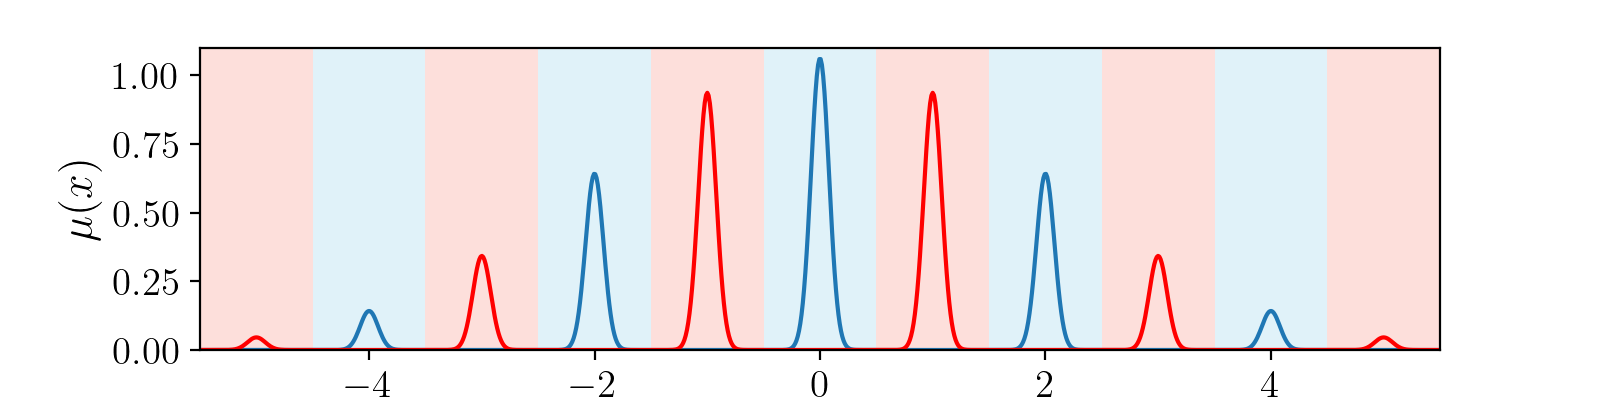

In [206]:
# import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
from scipy.optimize import fsolve, fmin_cobyla, fmin,root
import time
## old notation
Δ = 0.2
s = -10*np.log10(Δ**2)
print("sq. =% .2f dB" % s)
x = np.linspace(-1,1,1000)*10
η = 1
# μ = 1
plt.figure(figsize=(8, 2))
plt.ylim(0,1.1,)
plt.xlim(-5.5,5.5)
plt.xlabel('$x$',size=16)
plt.ylabel(r'$\mu(x)$',size=16)
def gkp_wf(μ,η,Δ,x,jmax = 10):
    Nμ = (pi**0.5/2)**0.5
    y = np.zeros(len(x))
    yy = np.zeros(len(x))
    for j in np.arange(-jmax,jmax):
        y += np.exp(-Δ**2*pi*(2*j+μ)**2) * np.exp(-(x - pi**0.5* η**0.5 *(2*j+μ))**2/Δ**2)/Nμ
    for j in np.arange(-jmax,jmax):
        yy += np.exp(-Δ**2*pi*(2*j+μ)**2) * np.exp(-(x - pi**0.5* η**0.5 *(2*j+μ))**2/Δ**2)/Nμ
    return y,yy
plt.plot(x/pi**0.5,gkp_wf(0,η,Δ,x)[0])
plt.plot(x/pi**0.5,gkp_wf(1,η,Δ,x)[0],'red')
for i in range(6):
    plt.fill_between([-5.5+2*i,-5.5+2*i+1],1.1,0, facecolor ='Salmon', alpha=0.25)
for i in range(5):
    plt.fill_between([-5.5+2*i+1,-5.5+2*i+2],1.1,0, facecolor ='Skyblue', alpha=0.25)
plt.yticks(np.arange(0, 1.01, step=0.25)) 
plt.savefig('GKP_demo.pdf')
plt.show()



In [58]:
pi**0.5

1.7724538509055159